In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 신경망
---
## 3.1 퍼셉트론에서 신경망으로
신경망은 가장 왼쪽 줄을 **입력층**, 맨 오른쪽 줄을 **출력층**, 중간 줄을 **은닉층** 이라고 한다.  

### 3.1.1 신경망의 예
만약 3줄의 입력층, 은닉층, 출력층이 있다고 가정할 때, 가중치를 갖는 층은 2개뿐이기 때문에 2층 신경망이라고 한다.  

### 3.1.2 퍼셉트론 복습
다음 식은 $x_1$과 $x_2$라는 두 신호를 입력받아 $y$를 출력하는 퍼셉트론이다.

**[식 3.1]**  
$
y=
\begin{cases}
0 & (b + w_1x_1 + w_2x_2 \le 0) \\
1 & (b + w_1x_1 + w_2x_2 > 0)
\end{cases}
$

여기서 b 는 **편향**을 나타내는 매개변수로, 뉴런이 얼마나 쉽게 활성화되느냐를 제어한다.  
한편, $w_1$과 $w_2$는 각 신호의 **가중치**를 나타내는 매개변수로, 각 신호의 영향력을 제어한다.

위의 식을 조금 더, 간결하게 작성해보자.  

**[식 3.2]**  
$
y = h(b + w_1x_1 + w_2x_2)
$

**[식 3.3]**  
$
h(x) = 
\begin{cases}
0 & (x \le 0) \\
1 & (x > 0)
\end{cases}
$

입력 신호의 총합이 $h(x)$라는 함수를 거쳐 변환되어, 그 변환된 값이 y의 출력이 됨을 보여준다.  

### 3.1.3 활성화 함수의 등장
조금 전 $h(x)$라는 함수가 등장했는데, 이처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반적으로 **활성화 함수**<sup>activation function</sup>라 한다.
[식 3.2]를 다시 써보면 다음과 같이 2단계로 나눌 수 있다.

**[식 3.4]**  
$a = b + w_1x_1 + w_2x_2$

**[식 3.5]**  
$y = h(a)$

즉, 가중치 신호를 조합한 결과가 a라는 노드가 되고, 활성화 함수 h()를 통과하여 y라는 노드로 변환되는 과정이다.  
뉴런과 노드는 동일한 의미이다.

**※ 주의사항**
- **단순 퍼셉트론**은 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 의미.
- **다층 퍼셉트론**은 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 의미.

## 3.2 활성화 함수
**[식 3.3]** 과 같은 활성화 함수는 임계값을 경계로 출력이 바뀌는데, 이런 함수를 **계단 함수**<sup>step function</sup>라 한다.  
그래서 "퍼셉트론에서는 활성화 함수로 계단 함수를 사용한다."라고 할 수 있다.  

### 3.2.1 시그모이드 함수
다음은 신경망에서 자주 이용하는 활성화 함수인 **시그모이드 함수**<sup>sigmoid function</sup>를 나타낸 식이다.

**[식 3.6]**  
$
\begin{align}
h(x)=\frac{1}{1+exp(-x)}
\end{align}
$

[식 3.6]에서 exp(-x)는 $e^{-x}$를 뜻하며, e는 자연상수로 2.7182... 의 값을 갖는 실수다.  
앞서 이야기한 퍼셉트론과 신경망의 주된 차이는 이 활성화 함수다.  

### 3.2.2 계단 함수 구현하기
계단 함수는 [식3.3]과 같이 입력이 0을 넘으면 1을 출력하고, 그 외에는 0을 출력하는 함수이다.

In [19]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0

In [21]:
# 실수만 처리 가능하다.
display(step_function(10))

# 인자로 넘겨받는 다음 함수는 넘파이 배열을 인수로 넣을 수는 없다. (에러발생)
# display(step_function(np.array([1, 5, -10])))

1

In [16]:
def step_function(x):
    y = x > 0
    return y.astype(np.int)

In [18]:
display(step_function(np.array([1, 5, -10])))

array([1, 1, 0])

### 3.2.3 계단 함수의 그래프

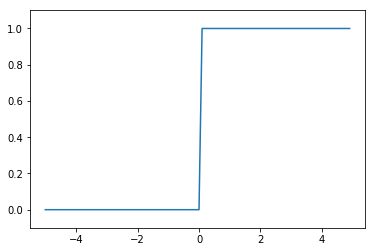

In [28]:
def step_function(x):
    return np.array(x > 0, dtype=np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)

plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [18]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [32]:
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [34]:
# 시그모이드 함수 원리
# (1 + np.exp(-x)) 는 결국 넘파이 배열을 반환해주고, 이는 브로드 캐스트 기능을 통하여 연산된 넘파이 배열 결과로 반환한다.
t = np.array([1.0, 2.0, 3.0])
1 / t

array([1.        , 0.5       , 0.33333333])

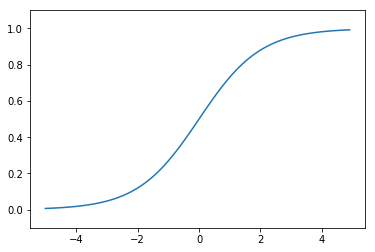

In [36]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)

plt.show()

### 짚고가기
시그모이드란 'S자 모양'이라는 뜻이다.

### 3.2.5 시그모이드 함수와 계단 함수 비교
* 시그모이드 함수  
    - 부드러운 곡선 형태
    - 출력이 연속적으로 변화
    - 실수를 반환함  
    
    
* 계단 함수
    - 0 또는 1을 반환
    
    
* 공통점
    - 입력이 작을 때는 출력이 0에 가깝다(혹은 0이 되는)
    - 입력이 커지면 출력이 1에 가깝다(혹은 1이되는)
    - 비선형 함수
    
    
* 차이점
    - 매끄러움

### 3.2.6 비선형 함수
**※ NOTE**  
함수란 어떤 값을 입력하면 그에 따른 값을 돌려주는 '변환기'이다. 이 변환기에 무언갈 입력했을 때 출력이 입력의 상수배만큼 변하는 함수를 **선형 함수**라고 한다. 수식으로는 $f(x) = ax + b$이고, 이때 a와 b는 상수이다. 그래서 선형 함수는 곧은 1개의 직선이 된다. **비선형 함수**는 직선 1개로는 그릴 수 없는 함수를 말한다.

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 왜냐하면 신경망의 층을 깊게하는 의미가 없기 때문이다.  
선형 함수인 $h(x) = cx$를 활성화 함수로 사용한 3층 네트워크를 떠올려보자. 이를 식으로 표현하면 $y = h(h(h(x)))$가 된다.  
$y = c * c * c * x$처럼 곱셈을 세 번 수행하지만, 실은 $y(x) = ax$와 같은 식이다. $a = c^3$이라고만 하면 끝이기 때문이다.

그러므로, 활성화 함수로는 비선형 함수를 사용한다.

### 3.2.7 ReLU 함수
시그모이드 함수는 신경망 분야에서 오래전부터 이용해왔으나, 최근에는 **ReLU**<sup>Rectified Linear Unit, 렐루</sup> 함수를 주로 이용한다.  
ReLU는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 함수다.

**[식 3.7]**  
$
h(x)=
\begin{cases}
x & (x > 0) \\
0 & (x <=0)
\end{cases}
$

In [3]:
def relu(x):
    return np.maximum(0, x)

## 3.3 다차원 배열의 계산
### 3.3.1 다차원 배열

In [7]:
A = np.array([1, 2, 3, 4])
print(A)

print("A 배열의 차원", np.ndim(A))
print("A 배열의 행과 열", A.shape)
print("A 배열의 행과 열 중 행의 개수", A.shape[0])

[1 2 3 4]
A 배열의 차원 1
A 배열의 행과 열 (4,)
A 배열의 행과 열 중 행의 개수 4


In [8]:
B = np.array([[1,2], [3,4], [5,6]])
print(B)

print("B 배열의 차원", np.ndim(B))
print("B 배열의 행과 열", B.shape)
print("B 배열의 행과 열 중 행의 개수", B.shape[0])

[[1 2]
 [3 4]
 [5 6]]
B 배열의 차원 2
B 배열의 행과 열 (3, 2)
B 배열의 행과 열 중 행의 개수 3


### 3.3.2 행렬의 곱

In [9]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [3]:
A = np.array([[1, 2, 3], [4, 5, 6]])
B = np.array([[1, 2], [3, 4], [5, 6]])

np.dot(A, B)

array([[22, 28],
       [49, 64]])

### ※ 주의할점
행렬 A 의 1번째 차원의 원소 수(열 수)와 행렬 B의 0번째 차원의 원소 수(행 수)가 같아야 한다.

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6]])
print(A.shape)

C = np.array([[1,2], [3,4]])
print(C.shape)

(2, 3)
(2, 2)


In [9]:
# 다음과 같은 에러발생
# np.dot(A, C)

ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

### 3.3.3 신경망에서의 행렬 곱

In [13]:
X = np.array([1, 2])
print(X)
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)

y = np.dot(X, W)
print(y)

[1 2]
(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


## 3.4 3층 신경망 구현하기
### 3.4.2 각 층의 신호 전달 구현하기

**[식 3.8]**  
$a_1^{(1)} = w_{11}^{(1)}x_1 + w_{12}^{(1)}x_2 + b_1^{(1)}$

행렬의 곱을 이용하여 1층의 '가중치 부분'을 다음 식처럼 간소화할 수 있다.

**[식 3.9]**  
$A^{(1)} = XW^{(1)} + B^{(1)}$


$
A^{(1)} = (a_1^{(1)} \space a_2^{(1)} \space a_1^{(1)}), \space X = (x_1 \space x_2), \space B^{(1)} = (b_1^{(1)} \space  b_2^{(1)} \space  b_3^{(1)})
$

$
W^{(1)} =
\left (
\begin{align}
w_{(11)} \space w_{(12)} \space w_{(13)} \\
w_{(21)} \space w_{(22)} \space w_{(23)}
\end{align}
\right )
$

In [17]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
A1

(2, 3)
(3,)


array([0.3, 0.7, 1.1])

In [19]:
Z1 = sigmoid(A1)
Z1

array([0.57444252, 0.66818777, 0.75026011])

In [24]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
A2

array([0.51615984, 1.21402696])

In [25]:
Z2 = sigmoid(A2)
Z2

array([0.62624937, 0.7710107 ])

In [26]:
def identity_function(x):
    return x

In [27]:
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
A3

array([0.31682708, 0.69627909])

In [28]:
Y = identity_function(A3)
Y

array([0.31682708, 0.69627909])

### 3.4.3 구현 정리

In [29]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network

def forword(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y

network = init_network()
x = np.array([1.0, 0.5])
y = forword(network, x)
print(y)

[0.31682708 0.69627909]
